In [1]:
import pandas as pd

There are two ways of importing datasets from Kaggle into the google colaboratory:
1. Uploading the downloaded dataset from kaggle and use it.
2. Or using the kaggle API token. You can find more about it here:\
https://medium.com/unpackai/how-to-use-kaggle-datasets-in-google-colab-f9b2e4b5767c
\
https://www.kaggle.com/docs/api

In [3]:
#download the ZIP file and upload it to the google colab
from google.colab import files
uploaded = files.upload()

Saving Kaggle-data.csv to Kaggle-data.csv


In [4]:
df = pd.read_csv('Kaggle-data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head(10)

,ID,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate,Unnamed: 57
0,1,b69acb3bb133974e48229627663f96d4,332,224,8450,8.0,0,16896,8192,0,16947,4096,24576,4194304.0,4096,512,6,0,6,0,5,1,40960,1024,84427,2,320,262144,4096,1048576,4096,0,16,4,3.761598,2.446533,6.450720,6016.000000,1024,16896,6096.250000,960.0,16731,3,44,0,31,1,3.492126,3.492126,3.492126,864.000000,864.0,864,72,0,1,NaN
1,2,1cbee4b3725629bd0aa6ac2ff500925f,332,224,258,9.0,0,84480,25600,0,10973,4096,90112,65536.0,4096,512,5,0,9,0,4,20,126976,1024,180181,9,320,65536,4096,1048576,4096,0,16,5,4.973822,3.269968,6.504334,22016.000000,1024,84480,21902.800000,992.0,84410,2,102,100,2,1,3.486827,3.486827,3.486827,892.000000,892.0,892,72,0,1,NaN
2,3,b7027cf0cd31c820928950cbfe7e91ef,332,224,8450,8.0,0,4608,3584,0,6452,4096,12288,264962048.0,4096,512,6,0,6,0,6,0,24576,1024,10208,2,320,262144,4096,1048576,4096,0,16,4,3.329824,0.278747,6.051986,1792.000000,512,4608,1708.000000,414.0,4294,2,27,0,3,1,3.517270,3.517270,3.517270,952.000000,952.0,952,72,0,1,NaN
3,4,156a0bb069f94d1e7c2508318805f2a4,332,224,8450,10.0,0,108544,15872,0,105021,4096,114688,268435456.0,4096,512,6,1,8,0,6,1,143360,1024,165754,3,320,1048576,4096,1048576,4096,0,16,5,3.404831,0.160329,6.662718,24883.200000,512,108544,25645.400000,85.0,108180,12,66,0,105,2,3.270559,3.034188,3.506931,1032.000000,972.0,1092,72,0,1,NaN
4,5,c72bf851fed5542abba904b1f3944cd5,332,224,8226,48.0,0,513024,2048,0,520922,8192,524288,268435456.0,8192,512,4,0,0,0,6,0,540672,512,582537,3,34144,1048576,4096,1048576,4096,0,16,3,2.978056,0.101910,6.390683,171690.666667,512,513024,171265.333333,12.0,512736,1,1,0,0,1,3.420977,3.420977,3.420977,954.000000,954.0,954,0,0,1,NaN
5,6,7af5fff227f2365b2e37c61f5dc84a01,332,224,8450,8.0,0,385024,769024,0,157943,4096,389120,719060992.0,4096,512,6,0,6,0,6,0,1163264,1024,1200109,2,320,262144,4096,1048576,4096,0,16,4,5.832451,4.227362,6.968439,287744.000000,35840,679424,288369.250000,35506.0,679320,15,400,32,2,129,4.881787,1.175739,7.983246,5214.782946,174.0,62656,72,0,1,NaN
6,7,de5a392683354bb4a3d5abcf62759998,332,224,8450,14.0,10,32256,9216,0,29184,4096,36864,268435456.0,4096,512,10,0,10,0,6,0,53248,1024,114633,2,16704,262144,4096,1048576,4096,0,16,5,4.281127,2.186891,6.230474,8089.600000,512,32256,7903.400000,1032.0,32029,17,85,0,2,1,3.455840,3.455840,3.455840,936.000000,936.0,936,160,0,1,NaN
7,8,a17adfa0ef5fc50f494fd325cd616dbf,34404,240,8226,10.0,0,74240,77312,0,46032,4096,0,268435456.0,4096,512,5,2,10,0,5,2,167936,1024,180754,3,64,1048576,4096,1048576,4096,0,16,6,4.309759,2.177307,6.282762,24234.666667,1536,74240,25046.333333,1522.0,74075,9,113,0,4,6,3.751431,1.248907,5.382808,5725.500000,48.0,24576,0,0,1,NaN
8,9,60118b30e104828ad3fc5c5ae7ada638,332,224,8450,14.0,10,259072,35328,0,70432,4096,266240,268435456.0,4096,512,10,0,10,0,10,0,307200,1024,294606,3,16704,262144,4096,1048576,4096,0,16,5,4.401713,0.854152,6.526357,58572.800000,512,259072,58603.800000,1408.0,258863,30,181,22,6,2,3.082250,2.680607,3.483892,614.000000,200.0,1028,160,0,1,NaN
9,10,b53ad3ea766890df8acc61cbd48a539a,332,224,290,11.0,0,41984,87040,0,34558,409

Shape of the dataset.\
As you can see there are 216352 records with 58 features.

In [6]:
df.shape

(216352, 58)

Here we can see each feature's number of missing values.\
'MajorLinkerVersion' column has just 1 missing value and 'Unnamed: 57' column is totally useless since there is no value.

In [7]:
df.isnull().sum()

ID                                  0
md5                                 0
Machine                             0
SizeOfOptionalHeader                0
Characteristics                     0
MajorLinkerVersion                  1
MinorLinkerVersion                  0
SizeOfCode                          0
SizeOfInitializedData               0
SizeOfUninitializedData             0
AddressOfEntryPoint                 0
BaseOfCode                          0
BaseOfData                          0
ImageBase                           0
SectionAlignment                    0
FileAlignment                       0
MajorOperatingSystemVersion         0
MinorOperatingSystemVersion         0
MajorImageVersion                   0
MinorImageVersion                   0
MajorSubsystemVersion               0
MinorSubsystemVersion               0
SizeOfImage                         0
SizeOfHeaders                       0
CheckSum                            0
Subsystem                           0
DllCharacter

In [8]:
df['MajorLinkerVersion'].fillna(df['MajorLinkerVersion'].mean(), inplace=True)

In [9]:
df.drop(columns=['Unnamed: 57'], inplace=True)

In [10]:
df.isnull().sum()

ID                             0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

In [11]:
df['legitimate'].value_counts()

0    140849
1     75503
Name: legitimate, dtype: int64

Statistics of all the columns

In [12]:
df.describe()

,ID,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,216352.000000,216352.000000,216352.000000,216352.000000,216352.000000,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,216352.000000,216352.000000,216352.000000,216352.000000,216352.000000,216352.000000,216352.000000,2.163520e+05,2.163520e+05,2.163520e+05,216352.000000,216352.000000,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,216352.000000,216352.000000,216352.000000,216352.000000,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,216352.000000,216352.000000,216352.000000,216352.000000,216352.000000,216352.000000,216352.000000,216352.000000,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,216352.000000,216352.000000
mean,108176.500000,225.390197,4658.018849,9.052688,4.297964,3.953857e+05,5.827978e+05,1.332425e+06,2.812198e+05,9.263616e+04,2.597506e+05,6.825622e+14,8.973149e+03,876.249815,5.891214,1.908686,65.019649,62.194170,4.915735,1.062089,8.306375e+05,1.444321e+03,1.198387e+08,2.211697,19125.945395,8.226597e+07,8.135296e+07,1.375880e+06,4.596753e+04,9.237207e+04,6.160888e+04,4.907304,4.500140,2.046629,6.780452,1.623791e+05,1.908853e+04,5.588631e+05,1.824943e+05,2.066624e+04,6.279258e+05,7.375374,114.004788,4.702134,24.093205,21.311201,3.758643,2.391066,5.149387,9.997022e+04,7.139624e+04,2.524535e+05,1.023401e+06,7.888492,0.348982
std,62455.587057,4.559983,7843.855241,71.522313,11.965284,1.962775e+07,2.841106e+07,7.337809e+07,1.254327e+07,9.922827e+06,6.712844e+06,1.121701e+17,7.194441e+05,1362.854293,183.580174,227.045651,1163.764427,1153.224766,1.041145,144.727471,6.859762e+06,5.878291e+03,4.965103e+08,0.500514,16258.493510,3.782155e+10,3.782156e+10,1.478766e+08,7.974684e+06,1.370714e+07,1.242031e+07,2.554187,1.121715,1.825340,1.049097,6.451482e+06,3.186122e+05,2.573865e+07,3.393885e+06,3.189600e+05,1.073093e+07,727.966935,137.024438,36.612958,267.169003,130.677090,1.305126,1.042133,1.864471,1.718201e+07,1.681531e+07,2.433613e+07,4.772522e+07,8.049384,0.476649
min,1.000000,176.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.553600e+04,0.000000e+00,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.520000e+02,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,54088.750000,224.000000,258.000000,7.000000,0.000000,2.560000e+04,1.536000e+04,0.000000e+00,1.253800e+04,4.096000e+03,2.457600e+04,4.194304e+06,4.096000e+03,512.000000,4.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.228800e+05,1.024000e+03,3.388675e+04,2.000000,320.000000,1.048576e+06,4.096000e+03,1.048576e+06,4.096000e+03,0.000000e+00,1.600000e+01,4.000000,3.746777,0.020393,6.305549,1.361920e+04,5.12000

The distribution of the legitmate column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


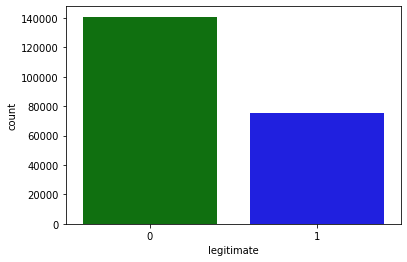

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


colors = ["green", "blue"]
sns.countplot('legitimate', data=df, palette=colors)

Another visualization of the classes in Legitmate column

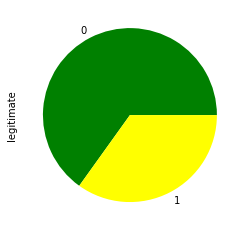

In [14]:
colors = ["green", "yellow"]
df["legitimate"].value_counts().plot.pie(colors = colors)
#plt.title("class 0 = Not Fraud || class 1 = Fraud")
plt.show()

Correlation of the features to eachother

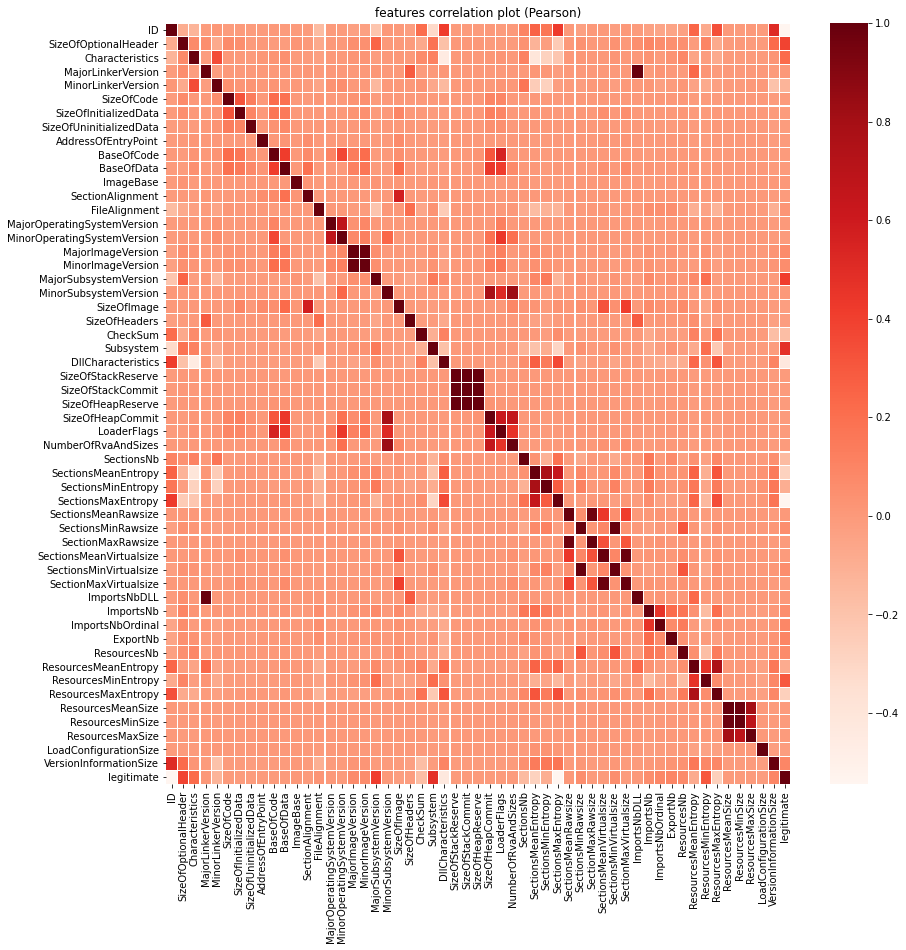

In [15]:

plt.figure(figsize = (14,14))
plt.title('features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()